In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_data_point = session.query(func.max(Measurement.date)).first()[0]

year = int(last_data_point.split('-')[0])
mth = int(last_data_point.split('-')[1])
date = int(last_data_point.split('-')[2])

last_date_in_db = dt.date(year, mth, date)
print("Last Date in DB:", last_date_in_db)

Last Date in DB: 2017-08-23


In [14]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = last_date_in_db - dt.timedelta(days=365)
print("\nOne year ago:", one_year_ago,"\n")


One year ago: 2016-08-23 



In [15]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp)\
                    .filter(Measurement.date >= one_year_ago)\
                    .order_by(Measurement.date).statement
print(query)

SELECT measurement.date, measurement.prcp 
FROM measurement 
WHERE measurement.date >= :date_1 ORDER BY measurement.date


In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql_query(query, session.bind)
new_df = df.set_index(df.date)
new_df = new_df[["prcp"]]
print(" ")
print(new_df.head())

 
            prcp
date            
2016-08-23  0.00
2016-08-23  0.15
2016-08-23  0.05
2016-08-23   NaN
2016-08-23  0.02


<AxesSubplot:xlabel='date'>

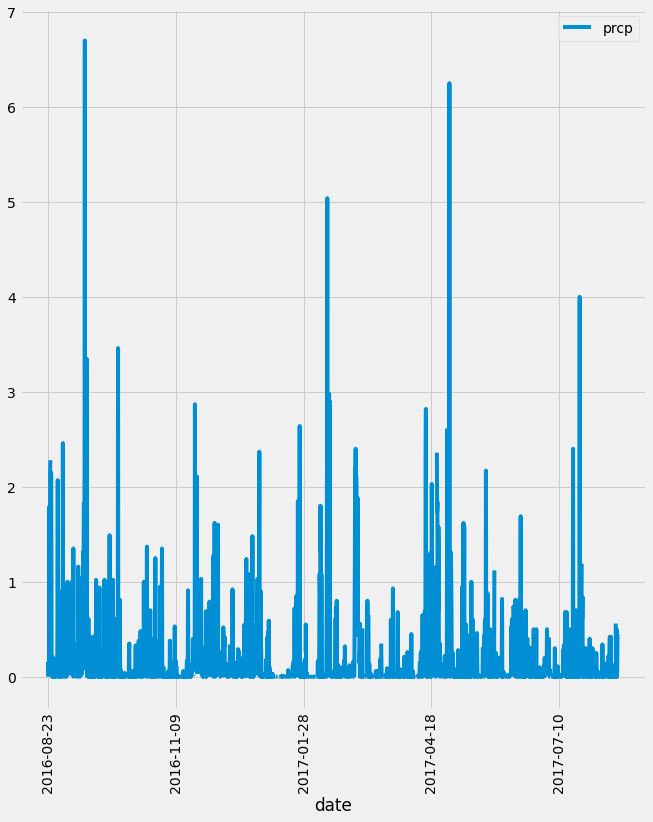

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df.plot(rot=90, figsize=(10,12))

FileNotFoundError: [Errno 2] No such file or directory: 'Images/precipitation.png'

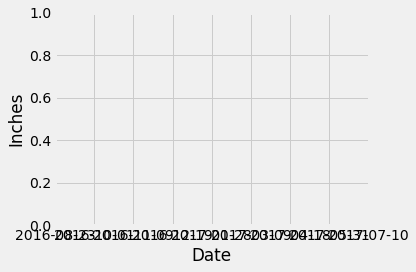

In [19]:
# Set x-tick position and labels
positions = np.arange(0, len(new_df.index), 250)
labels = [new_df.index[position] for position in positions]
plt.xticks(positions, labels)

#Set the x and y axis labels
plt.xlabel("Date")
plt.ylabel("Inches")

# Save and display the plot
plt.tight_layout()
plt.savefig("Images/precipitation.png")
plt.show()

